In [3]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [4]:
# 1. Load historical stock data
data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")


[*********************100%***********************]  1 of 1 completed


In [5]:
# 2. Prepare the dataset
data['Next_Close'] = data['Close'].shift(-1)  # Target: Next day's closing price
data.dropna(inplace=True)  # Remove rows with missing values

In [6]:
# 3. Define features (X) and target (y)
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Next_Close']

In [7]:
# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 5. Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# 6. Make predictions
predictions = model.predict(X_test)

In [13]:
# 7. Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 11.02845122151313


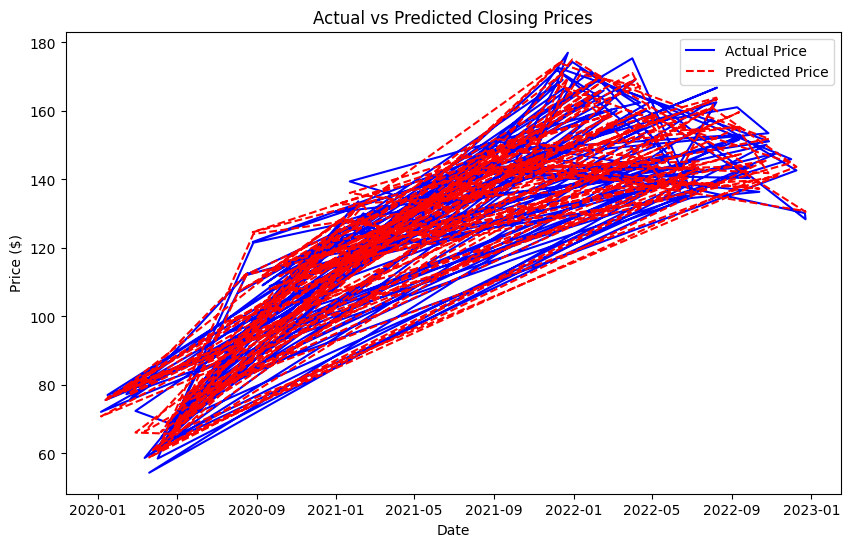

In [17]:
# 8. Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()